In [2]:
import pandas as pd
import numpy as np
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import statsmodels.api as sm


## 데이터 설명
#### id : data id

#### digit : hidden num

#### letter : alpabet which hide num

#### 0~783 : 28*28 pixel val

In [3]:
#Data set
train_df = pd.read_csv("train.csv")
train_df

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
#0번 이미지 봐보기 
# id	digit	letter	 드랍 
np.array(train_df.loc[0])[3:]

array([1, 1, 1, 4, 3, 0, 0, 4, 4, 3, 0, 4, 3, 3, 3, 4, 4, 0, 0, 1, 1, 3,
       4, 0, 4, 2, 0, 4, 0, 1, 3, 1, 0, 4, 1, 1, 3, 1, 2, 4, 2, 4, 3, 1,
       0, 1, 2, 3, 0, 3, 3, 1, 3, 4, 1, 3, 2, 0, 4, 4, 2, 3, 2, 3, 0, 0,
       4, 0, 2, 16, 73, 51, 21, 1, 2, 1, 4, 3, 3, 2, 1, 3, 3, 3, 0, 2, 4,
       1, 0, 0, 0, 0, 1, 0, 0, 3, 108, 176, 249, 190, 128, 3, 0, 3, 1, 1,
       4, 0, 4, 3, 3, 3, 3, 0, 0, 4, 2, 3, 1, 4, 4, 3, 3, 4, 133, 188,
       207, 107, 96, 1, 1, 1, 2, 4, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2,
       2, 4, 1, 0, 1, 119, 137, 133, 28, 0, 4, 3, 1, 3, 2, 4, 1, 1, 2, 3,
       3, 4, 2, 3, 4, 4, 4, 2, 1, 1, 2, 4, 3, 0, 31, 123, 62, 5, 3, 3, 2,
       4, 3, 2, 2, 1, 3, 0, 3, 1, 4, 4, 3, 2, 4, 4, 3, 1, 3, 0, 4, 5, 46,
       126, 66, 3, 3, 3, 1, 4, 0, 1, 4, 4, 1, 1, 3, 4, 4, 1, 3, 2, 0, 3,
       0, 3, 2, 0, 4, 6, 65, 127, 67, 6, 0, 2, 3, 1, 1, 1, 4, 4, 4, 4, 3,
       1, 2, 1, 2, 0, 1, 1, 3, 2, 3, 0, 1, 4, 66, 120, 44, 3, 2, 0, 1, 3,
       4, 4, 3, 1, 2, 0, 3, 0, 3, 4, 3, 2, 0

In [5]:
#ARRAY 화
array_0 =np.array(train_df.loc[0])[3:]
#자료형 변경
array_0= array_0.astype(int)
#28*28 배열 변경
array_0 =array_0.reshape(28,28)

In [6]:
#Data save
train_df = pd.read_csv("train.csv")

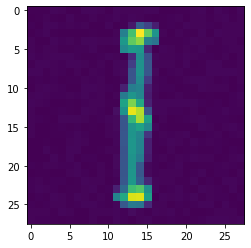

In [7]:
pix = array_0
plt.imshow(pix)

In [8]:
#알파벳 별로 몇개 있는지 체크
train_df.groupby(train_df["letter"]).size()

letter
A    72
B    71
C    74
D    76
E    66
F    80
G    87
H    89
I    64
J    67
K    90
L    89
M    86
N    77
O    90
P    66
Q    82
R    81
S    76
T    82
U    85
V    73
W    69
X    79
Y    86
Z    91
dtype: int64

In [9]:
#숫자 별로 몇개 데이터 있는지 체크
train_df.groupby(train_df["digit"]).size()

digit
0    191
1    202
2    233
3    205
4    207
5    225
6    212
7    194
8    182
9    197
dtype: int64

In [10]:
train_df["digit"] = train_df["digit"].astype(str)
train_df["Y"] = str(train_df["digit"] )+str(train_df["id"])

train_df["Y"] = train_df["letter"] +train_df["digit"]
train_df["Y"].groupby(train_df["Y"]).size()


Y
A0     5
A1     3
A2     9
A3     1
A4     7
      ..
Z5    16
Z6     9
Z7    11
Z8     3
Z9     5
Name: Y, Length: 260, dtype: int64

In [11]:
train_df =train_df.drop(["id","digit","letter"],axis=1)

In [12]:
train_df["Y"]

0       L5
1       B0
2       L4
3       D9
4       A6
        ..
2043    V6
2044    L1
2045    A9
2046    Z0
2047    Z5
Name: Y, Length: 2048, dtype: object

In [13]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Y
0,1,1,1,4,3,0,0,4,4,3,...,1,0,1,2,4,4,4,3,4,L5
1,0,4,0,0,4,1,1,1,4,2,...,3,0,1,4,1,4,2,1,2,B0
2,1,1,2,2,1,1,1,0,2,1,...,3,3,0,2,0,3,0,2,2,L4
3,1,2,0,2,0,4,0,3,4,3,...,3,2,0,1,4,0,0,1,1,D9
4,3,0,2,4,0,3,0,4,2,4,...,4,3,2,1,3,4,3,1,2,A6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2,4,3,4,2,4,4,1,2,1,...,2,2,0,0,1,3,1,4,0,V6
2044,3,2,2,1,1,4,0,1,4,2,...,3,4,2,1,2,3,4,1,1,L1
2045,4,0,4,0,2,4,4,4,3,4,...,3,1,1,3,4,2,2,0,0,A9
2046,2,3,3,0,3,0,4,3,0,1,...,3,1,1,0,4,1,4,3,1,Z0


In [ ]:
해석 가능 
모델 해석
모델 대한 해석